# Chapter 7. Decision trees

## 7-1. __Decision Tree (DT)__
- non-parametric / non-linear supervised learning methods
    * for classification or for regression
    * very simple concept
- DT is a piecewise-constant function
    * using tree to partition domain
        * recursively partition a node until data in the node is __pure__ enough
        * using a __impurity measure__
    * usually binary tree is used
- Data $D = (X, Y)$
    * Feature matrix $X = \{\mathbf{x}_j; j=1..n\}$, where $\mathbf{x}_j = (x^{(1)}_j, ..., x^{(p)}_j) $
    * Label vector $Y = \{y_1, ..., y_n\}$
- Tree terminology
    * root
    * parent, childeren
    * decision node : split information (axis, value)  e.g. $x^{(1)} \leq c$
    * leaf node : data, label for the node
    * depth : 0, 1, ...
    * sub-tree

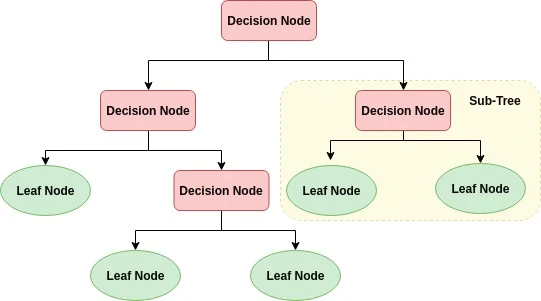

### 7-1-1. Popular DT algorithms
- Ross Quinlan's algorithms
    - ID3 (1986), "Introduction of decision trees", _Machine Learning_(1)
    - C4.5 (1993), _Programs for Machine Learning_
        improvement over ID3
    - C5.0 (1996?) : further improvement on C4.5
- CART (Classification And Regression Tree)
    - Breiman et al (1984), _Classification And Regression Tree_
    - similar to C4.5
    - use only __binary__ split
        * binary tree
        * only axis-aligned split is allowed
            * $x^{(1)} \leq \theta$ : axis-aligned split, allowed
            * $x^{(1)} + x^{(2)} \leq \theta$ : oblique split, not allowed
    - sklean.tree implements CART (with some modifications)
        - sklearn.tree.DecisionTreeClassifier
        - sklearn.tree.DecisionTreeRegressor

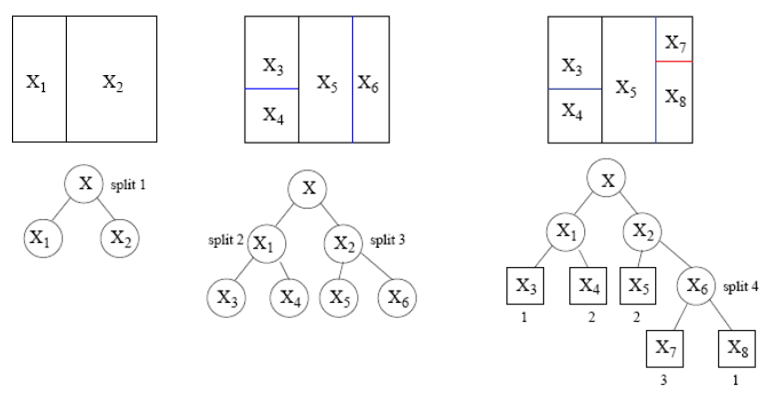

### 7-1-2. Splitting a node : Impurity measure, Impurity gain
* Data of a node $D = (X, Y)$: training dataset of feature matrix $X$ and label vector $Y$
    * $D = \{(\mathbf{x}_j, y_j); j=1..n\}$
    * $X = \{\mathbf{x}_j; j=1..n\}$, where $\mathbf{x}_j = (x^{(1)}_j, ..., x^{(p)}_j) $
    * $Y = \{y_j; j=1..n\}$
* split $s = (a,\theta)$, where $a$ is the split axis, $\theta$ is the split value 
    * $D_\text{left}$ : data assigned to the left node after split $s$
        * if the split axis $x^{(a)}$ is __cardinal or ordinal__ : $D_\text{left}=\{(\mathbf{x}_j, y_j); x^{(a)}_j \leq \theta \}$ 
        * if the split axis $x^{(a)}$ is __categorical__ : $D_\text{left}=\{(\mathbf{x}_j, y_j); x^{(a)}_j \in \theta \}$ 
    * $D_\text{right}$ : data assigned to the right node after split $s$    
        * $D_\text{right} = D \setminus D_\text{left}$
* impurity measure of $D$ : $\text{Imp}(D)$
    * a function to measure how much different $y_i \in Y$ are
    * examples of impurity measure: __variance, entropy, or Gini impurity_ of $Y$
* weighted average impurity after split $D \to D_\text{left}, D_\text{right}$
    * $\text{Imp}(D,s) = \left(w_\text{left}\text{Imp}(D_\text{left})+w_\text{right}\text{Imp}(D_\text{right})\right)$         
        * $w_\text{left} = \frac{|D_\text{left}|}{|D|}$
        * $w_\text{right} = \frac{|D_\text{right}|}{|D|}=1-w_\text{left}$
* impurity gain due to a split $s$
    * $\Delta\text{Imp}(D,s)$ : impurity gain due to split (= goodness of split) $s$ applied to $D$
        * $\Delta\text{Imp}(D,s) = \text{Imp}(D) - \text{Imp}(D,s)$
    * information gain, Gini gain, or variance gain (see below)


### 7-1-3. How to build a binary DT?
- Algorithm __BuildDT__($D$, depth=0)
    * input 
        * $D = (X, Y)$: training dataset of feature matrix $X$ and label vector $Y$
        * depth : depth of current node
    * output $T$ = decision tree root node
    * recursively split its children
        * depth-first split
1. create a node $T$ with data $D$
    * $T$.data = $D$
    * set $T$.value : representative value for node $T$
        * $T$.value : majority of label in $D$ for classification
        * $T$.value : mean of label in $D$ for regression
2. if _stopping condition_ is met, return $T$
    * depth == max_depth
    * $|D| \leq$ min_samples_split
    * $D = (X, Y)$ is 'pure enough', eg. $\text{Imp}(D)$ is small enough
        * eg. $Y$ contains only one class
        * eg. $\text{Var}(Y) < \epsilon$ 
3. select the best split 
    * select the split with the largest impurity gain: $s^* = \arg \max \Delta\text{Imp}(D,s)$
        * $s = (a,\theta)$
            * $a$ is the split axis
            * $\theta$ is the split value 
        * if $\Delta\text{Imp}(D,s^*)$ < min_impurity_decrease, return $T$ (without applying $s^*$
4. apply $s^*$ to $D$ into $D_\text{left}$ and $D_\text{right}$
    * $T$.split = $s^*$
    * $T$.left = BuildDT($D_\text{left}$, depth+1)
    * $T$.right = BuildDT($D_\text{right}$, depth+1)
5. return $T$

## 7-2. DT for Regression
- consider a node $n$ and s split $s$
     * $D$ : data in node $n$
     * $D_\text{left}$ : data assigned to the left node after split $s$
     * $D_\text{right}$ : data assigned to the right node after split $s$
- __impurity measure__ : __Var__(variance)
    - $\text{Imp}(D) = \text{Var}(D) = \frac{1}{|D|}\sum_{j \in D} \left(y_j - \bar{y}\right)^2$
        - $\bar{y} = \frac{1}{|D|}\sum_{j \in D} y_j$
- __Split selection__ : select split $s = (a, \theta)$ with the largest __variance gain__
    - $\Delta\text{Imp}(D, s)$ : variance reduction by split $s$
        - $\Delta\text{Imp}(D, s) = \text{Var}(D) - \left(w_\text{left}\text{Var}(D_\text{left})+w_\text{right}\text{Var}(D_\text{right}\right)$         
        * $w_\text{left} = \frac{|D_\text{left}|}{|D|}$
        * $w_\text{right} = \frac{|D_\text{right}|}{|D|}=1-w_\text{left}$

### 7-2-1. How to select split value $\theta$
- choose $\theta$ which gives the best split selection measure
- for categorical variable : choose $\theta$ among all possible categories
     * $D_\text{left} = \{(\mathbf{x}_j, y_j) \in D; x^{(a)}_j == \theta\}$
- for numerical (cardinal or ordinal) variable : choose $\theta$ in-between $x^{(a)}$ values
     * $D_\text{left} = \{(\mathbf{x}_j, y_j) \in D; x^{(a)}_j \leq \theta\}$
- $D_\text{right} = D - D_\text{left}$

## 7-3. DT for Classification
- __Split selection measures__ : impurity measure of a node's data
    - __information gain__ : used in ID3 or C4.5
    - __Gini impurity index gain__ : used in CART (so, in sklearn)

### 7-3-1. Entropy, Information gain
- classes : $c=1..K$
- $D$ : training dataset before split $s$
    - class count $n_c : \#(y_j == c)$ for $j \in $ data $D$ 
    - $\mathbf{p} = (p_1, ..., p_K)$ 
        - where $p_c = \frac{n_c}{|D|} $ : fraction of class $c$ in data $D$
- __impurity measure__ : entropy
    - $\text{Imp}(D) = H(\mathbf{p}) = -\sum_{c=1}^K p_c\log p_c$
- __impurity gain__ = __information gain__ = __entropy gain__ : attribute selection measure used in ID3 and C4.5
    - $\Delta\text{Imp}(D, s) = \text{Imp}(D) - \text{Imp}(D, s)$
    - amount of entropy decrease after split $s = (a, \theta)$

### 7-3-2. Gini impurity index, Gini gain
- classes : $c=1..K$
- __impurity measure__ $\text{Gini}(\mathbf{p})$ : Gini impurity index of data $D$
    - impurity used in CART algorithm, so in sklearn.tree.DecisionTreeClassifier
    - $\text{Imp}(D) = \text{Gini}(\mathbf{p}) = \sum_{c=1}^K p_c(1 - p_c) = \sum_{c=1}^K p_c - p_c^2 = 1-\sum_{c=1}^K p_c^2$
    - $\text{Gini}(\mathbf{p})$ is similar to entropy $H(\mathbf{p})$
        * entropy $H(\mathbf{p}) = -\sum_{c=1}^K p_c\log p_c$
        * $\log p_c$ is replaced by $p_c-1$
            * $\log x \approx x-1 \text{ when } x\approx 1$
    - $\text{Gini}(\mathbf{p})$ also attains maximum when $\mathbf{p}$ is uniform
        * $p_x = \frac{1}{K} \to \text{Gini}(\mathbf{p}) = 1-\frac{1}{K}$
    - $\text{Gini}(\mathbf{p})=0$ when $p_c = 1$ and $p_x = 0$ for all other $x$
- __impurity gain__ = __Gini gain__ : defined as before
    - $\Delta\text{Imp}(D, s) = \text{Imp}(D) - \text{Imp}(D, s)$

### 7-3-3. Example : DT for Iris Classification

In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
Y_iris = iris['species']

from sklearn.model_selection import train_test_split
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_iris, Y_iris, test_size=0.2)

In [71]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trn, Y_trn)
print(f"DT test accuracy = {dt.score(X_tst, Y_tst):.3f}")

DT test accuracy = 0.900


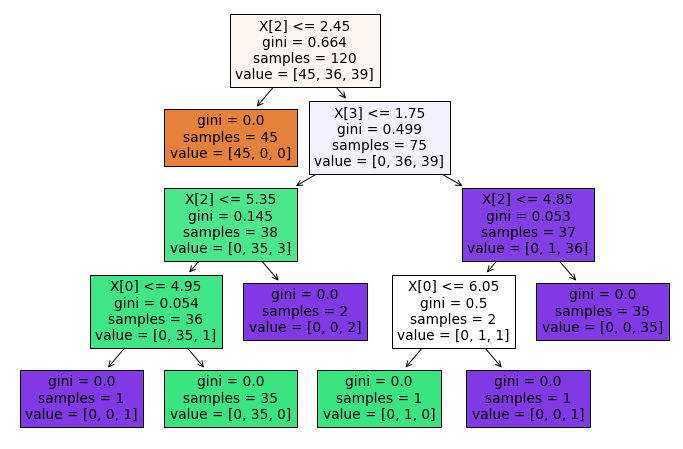

In [58]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True);

In [31]:
# mapping class name to integer is required
# for plotting decision boundary as contour
name_to_int = {'setosa':0, 'versicolor':1, 'virginica':2}
def map_name_to_int(Y, Z):
    Yi = Y.map(name_to_int)
    Zi = np.zeros(Z.shape)    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Zi[i,j] = name_to_int[Z[i,j]]
    return Yi, Zi

In [32]:
def plot_decision_boundary(dt, A, B, Y, c1=None, c2=None, title=""):
    step = 0.01
    aa, bb = np.meshgrid(np.arange(A.min()-0.2, A.max()+0.2, step),
                         np.arange(B.min()-0.2, B.max()+0.2, step))
    Z = dt.predict(np.c_[aa.ravel(), bb.ravel()])
    Z = Z.reshape(aa.shape)
    Yi, Zi = map_name_to_int(Y, Z)
    cs = plt.contourf(aa, bb, Zi, cmap=plt.cm.RdYlBu)
    plt.axis("tight")

    plt.scatter(A, B, c=Yi, edgecolor='black', s=20)
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.title(title)

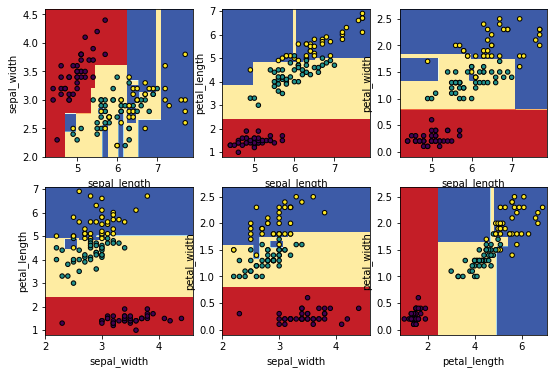

In [33]:
plt.figure(figsize=(9,6))
dt = tree.DecisionTreeClassifier()
k = 0
for i in range(3):
    for j in range(i+1,4):
        c1 = X_trn.columns[i]
        c2 = X_trn.columns[j]
        dt.fit(X_trn[[c1,c2]], Y_trn)
        k += 1
        plt.subplot(2, 3, k)
        plot_decision_boundary(dt, X_trn[c1], X_trn[c2], Y_trn, c1, c2)

## 7-4. Advantage and disadvantage of DT

### 7-4-1. Advantage of DT
- DT is a _universal approximator_
    * DT is a non-parametric model
    * DT can approximate any complex decision boundary if infinite depth is allowed
- DT is explainable and can be visualized 
- Categorical variables can be used without introducing dummy variables.

### 7-4-2. Disadvantage of DT
- DT can easily overfit!!
    - which is a big problem of DT
- Decision boundary is jagged.

### 7-4-3. How to prevent overfitting?
* __Early stopping__ of tree building (7-5)
    * tree depth : `max_depth`
    * leaf node sample size : `min_samples_leaf`
    * improvement due to a split : `min_impurity_decrease`
* post-build __pruning__ (7-6)
    * minimal Cost-Complexity Pruning
* __ensembling__ : bag of tree, random forest (Chap.8)

## 7-5. Early stopping of tree building

### 7-5-1. Effect of max_depth

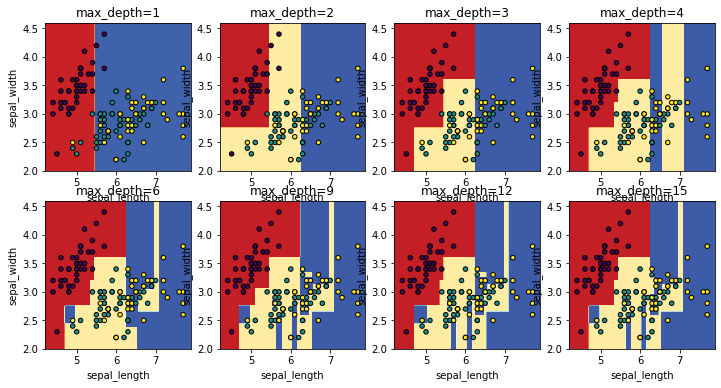

In [34]:
plt.figure(figsize=(12,6))
c1 = X_trn.columns[0]
c2 = X_trn.columns[1]
trn_r2 = []
tst_r2 = []
depths = [1,2,3,4,6,9,12,15]
k = 0
for d in depths:
    dt = tree.DecisionTreeClassifier(max_depth = d)
    # dt = tree.DecisionTreeClassifier()
    dt.fit(X_trn[[c1,c2]], Y_trn)
    k += 1
    plt.subplot(2,4,k)
    plot_decision_boundary(dt, X_trn[c1], X_trn[c2], Y_trn, c1, c2, f'max_depth={d}')
    trn_r2.append(dt.score(X_trn[[c1,c2]], Y_trn))
    tst_r2.append(dt.score(X_tst[[c1,c2]], Y_tst))
    # print(f'max_depth={d}, train score = {trn_r2[-1]:.3f}, test score = {tst_r2[-1]:.3f}')

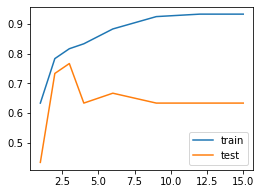

In [35]:
plt.figure(figsize=(4,3))
plt.plot(depths, trn_r2, label='train')
plt.plot(depths, tst_r2, label='test')
plt.legend();

### 7-5-2. Effect of _limiting leaf node size_ or _improvement due to split_
- limiting split by __leaf node size__
    * _min_samples_split_ : do not split a node if (# of samples of the node) < min_samples_split
    * min_samples_leaf : do not split a node  
        if (# of samples of a child node after split) < _min_samples_leaf_
- limiting split by __impurity gain__
    * _min_impurity_decrease_ : do not split a node if (impurity gain due to a split) < _min_impurity_decrease_
    * this may result in too-early stopping
        - big improvement may come later
        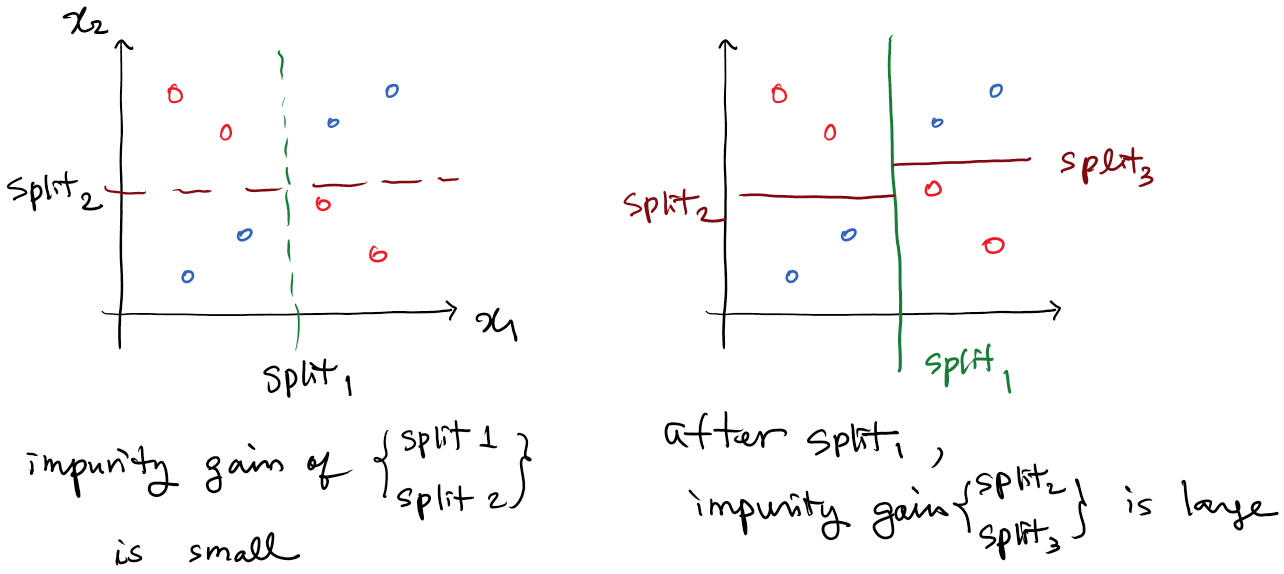

min_samples_leaf=5, train score = 0.817, test score = 0.700
min_impurity_decrease=0.01, train score = 0.817, test score = 0.767


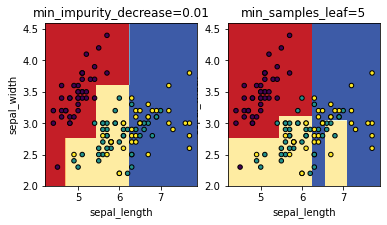

In [36]:
plt.figure(figsize=(6,3))
def fit_plot_dt(dt, prefix=""):
    dt.fit(X_trn[[c1,c2]], Y_trn)
    plot_decision_boundary(dt, X_trn[c1], X_trn[c2], Y_trn, c1, c2, prefix)
    print(f'{prefix}, train score = {dt.score(X_trn[[c1,c2]], Y_trn):.3f},', 
          f'test score = {dt.score(X_tst[[c1,c2]], Y_tst):.3f}')

# min_samples_leaf
plt.subplot(1,2,2)
dt = tree.DecisionTreeClassifier(min_samples_leaf=5)
fit_plot_dt(dt,"min_samples_leaf=5")

# min_impurity_decrease
plt.subplot(1,2,1)
dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
fit_plot_dt(dt, "min_impurity_decrease=0.01")

## 7-6. Pruning DT
- remove unnecessary branches after building full-depth tree

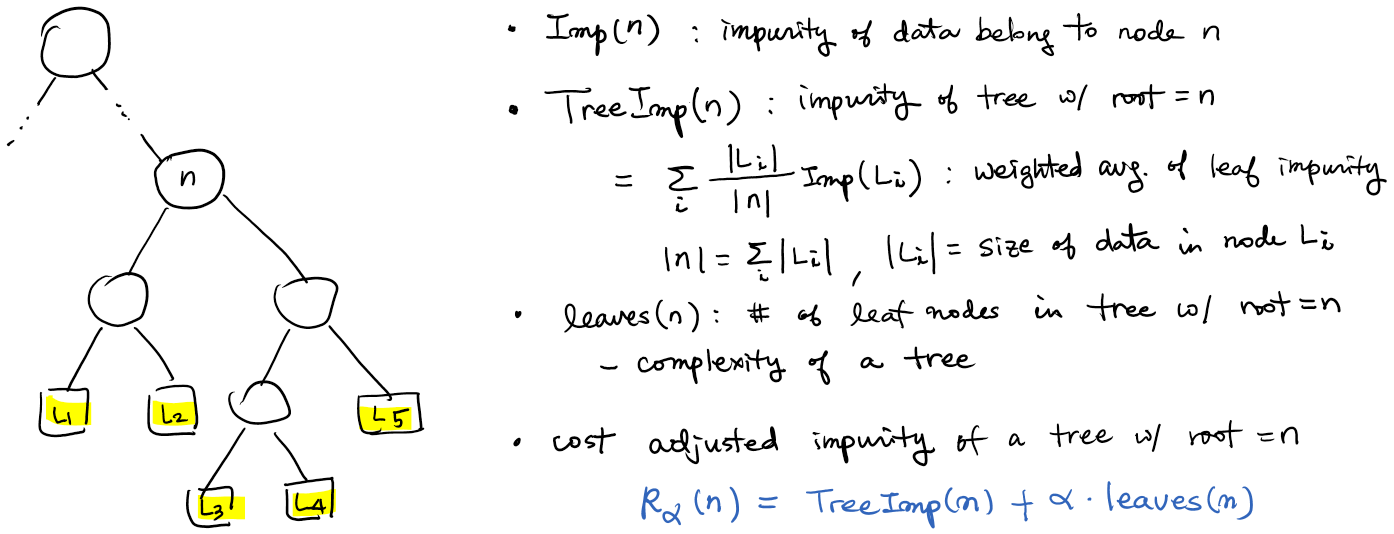

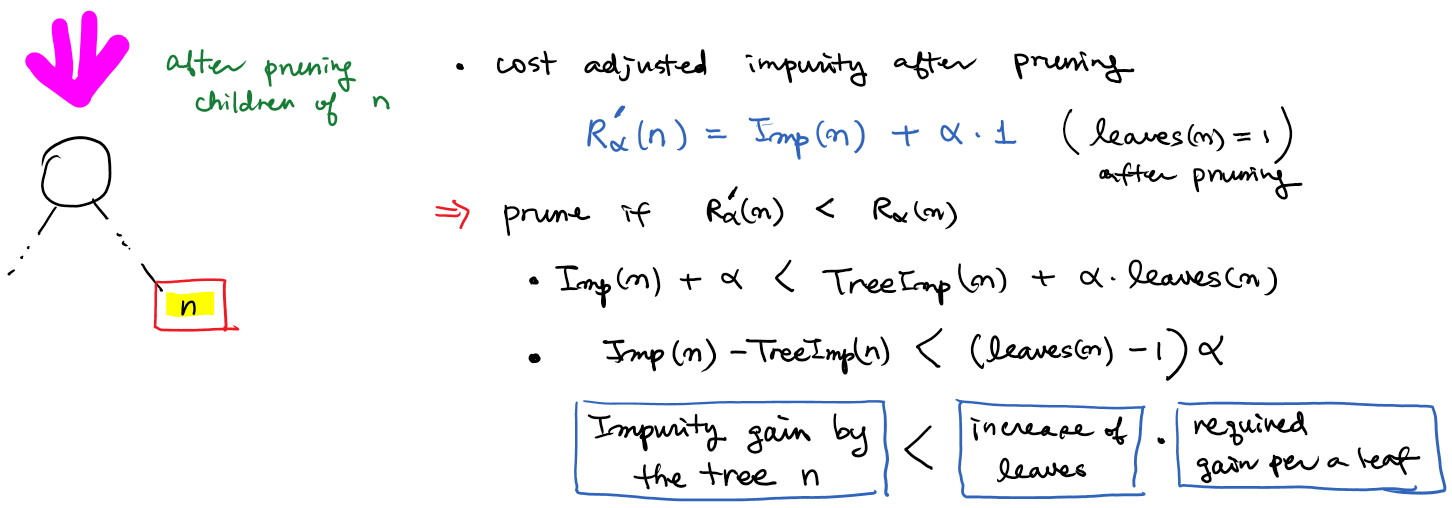

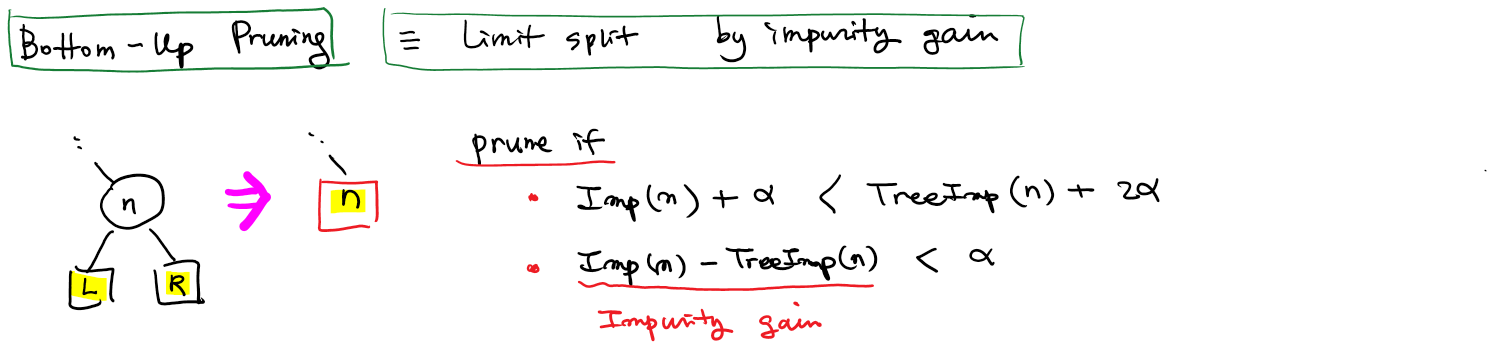

ccp_alpha=0.001, train score = 0.933, test score = 0.633
ccp_alpha=0.01, train score = 0.850, test score = 0.667


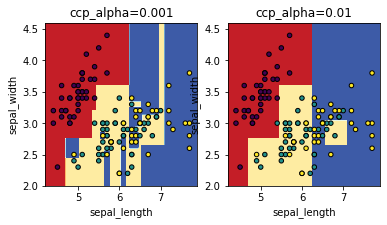

In [40]:
plt.figure(figsize=(6,3))

# Left figure : cost-complexity pruining alpha=0.001
plt.subplot(1,2,1)
dt = tree.DecisionTreeClassifier(ccp_alpha=0.001)
fit_plot_dt(dt, "ccp_alpha=0.001")

# Right figure : cost-complexity pruining alpha=0.01
plt.subplot(1,2,2)
dt = tree.DecisionTreeClassifier(ccp_alpha=0.01)
fit_plot_dt(dt, "ccp_alpha=0.01")

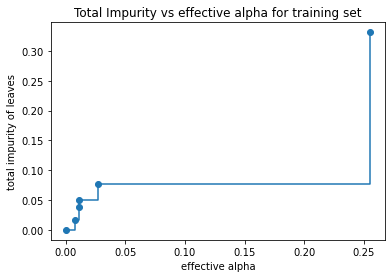

In [38]:
# skip this
path = dt.cost_complexity_pruning_path(X_trn, Y_trn)
plt.plot(path.ccp_alphas[:-1], path.impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set");

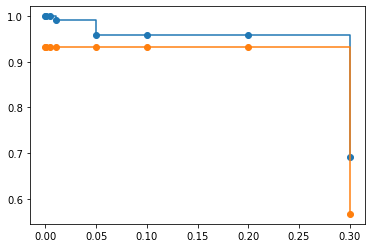

In [44]:
trn_acc = []
tst_acc = []
alpha_list = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
for alpha in alpha_list:
    dt = tree.DecisionTreeClassifier(ccp_alpha=alpha)
    dt.fit(X_trn, Y_trn)
    trn_acc.append(dt.score(X_trn, Y_trn))
    tst_acc.append(dt.score(X_tst, Y_tst))

plt.plot(alpha_list, trn_acc, marker='o', label="train", drawstyle="steps-post")
plt.plot(alpha_list, tst_acc, marker='o', label="test", drawstyle="steps-post")